# SLR GDP Prediction

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import Data
df0 = pd.read_csv('canada_per_capita_income.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [4]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

# EDA

In [5]:
df.rename(columns={'per capita income (US$)':'per_capita_income'}, inplace=True)

df.columns

Index(['year', 'per_capita_income'], dtype='object')

In [6]:
df.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [7]:
x_axis = df['year']
y_axis = df['per_capita_income']

In [49]:
y_axis.describe()

count       47.000000
mean     18920.137063
std      12034.679438
min       3399.299037
25%       9526.914515
50%      16426.725480
75%      27458.601420
max      42676.468370
Name: per_capita_income, dtype: float64

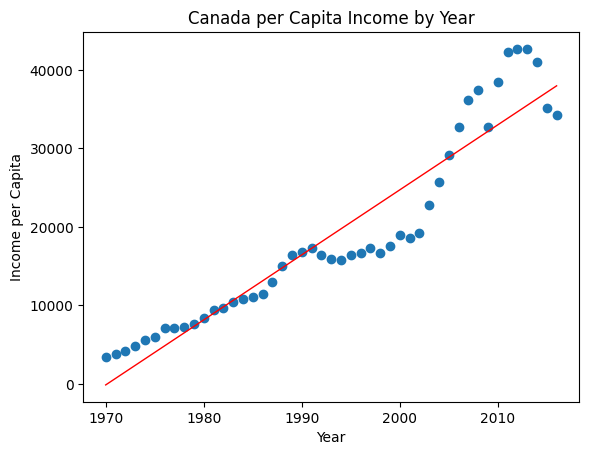

In [8]:
plt.scatter(x_axis, y_axis)


# Calculate the Best Fit Line
slope, intercept = np.polyfit(x_axis, y_axis, 1)
best_fit_line = slope * x_axis + intercept

# Plot the Best Fit Line
plt.plot(x_axis, best_fit_line, color='red', linewidth=1, label='Best Fit Line')

plt.xlabel('Year')
plt.ylabel('Income per Capita')
plt.title('Canada per Capita Income by Year')

plt.show();

In [9]:
# Correlation between X & Y
df.corr()

,year,per_capita_income
year,1.000000,0.943884
per_capita_income,0.943884,1.000000


### 

In [10]:
import seaborn as sns

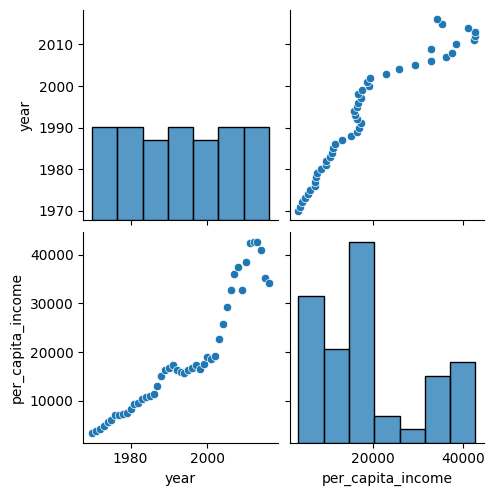

In [11]:
# Pairplot
sns.pairplot(df);

## Data Preparation

In [12]:
X = df[['year']]
y = df['per_capita_income']

In [13]:
X.shape

(47, 1)

In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
y.shape

(47,)

In [16]:
type(y)

pandas.core.series.Series

## Train the Model

In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardisation of data
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-1.02132922],
       [-1.37783093],
       [-1.1639299 ],
       [ 1.26028171],
       [ 0.76117932],
       [-0.66482751],
       [-0.37962614],
       [ 1.54548308],
       [-0.52222683],
       [-0.95002888],
       [-0.45092649],
       [ 0.47597796],
       [ 0.68987898],
       [ 1.61678342],
       [-1.59173195],
       [ 0.61857864],
       [ 0.5472783 ],
       [-1.23523024],
       [-0.80742819],
       [ 0.83247966],
       [-1.52043161],
       [ 1.33158206],
       [-0.09442478],
       [-1.44913127],
       [ 0.90378001],
       [ 0.04817591],
       [ 1.04638069],
       [-0.87872854],
       [-0.02312444],
       [-0.3083258 ],
       [ 1.68808376],
       [-0.16572512],
       [-1.09262956],
       [ 1.4028824 ],
       [-0.59352717],
       [ 0.40467761],
       [ 1.11768103]])

In [24]:
X_test

array([[ 0.33337727],
       [ 1.18898137],
       [ 0.26207693],
       [ 1.47418274],
       [ 0.11947625],
       [ 0.97508035],
       [-0.73612785],
       [-0.23702546],
       [-1.30653058],
       [ 0.19077659]])

## Simple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
print('Coefficient: ', regression.coef_[0])
print('Intercept: ', regression.intercept_)

Coefficient:  11432.51903245591
Intercept:  18468.057662162202


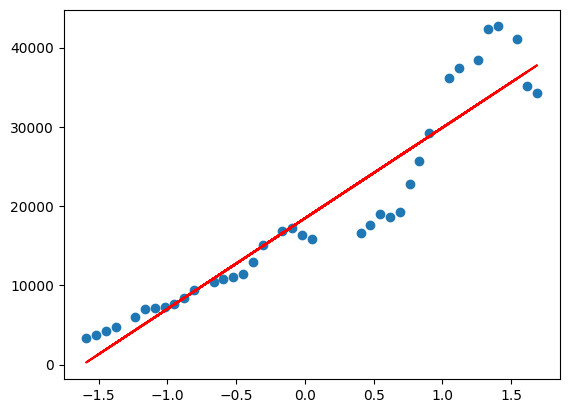

In [29]:
# Plot the best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red');

## Prediction of Test Data

predicted Income per Capita Output = Intercept + Coefficient (year)

y_pred_test = 18468.057662162202 + 11432.51903245591 (X_test)

In [30]:
y_pred = regression.predict(X_test)

## Performance Metrics

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [35]:
print('mse: ', mse)
print('mae: ', mae)
print('rmse: ', rmse)
print('r2: ', r2)
print('adj_r2: ', adj_r2)

mse:  15147815.547786241
mae:  3240.9139974758386
rmse:  3892.0194690913663
r2:  0.87517713968463
adj_r2:  0.8595742821452087


### OLS Linear Regression

In [38]:
import statsmodels.api as sm

In [39]:
model = sm.OLS(y_train, X_train).fit()

In [40]:
prediction = model.predict(X_test)

In [41]:
prediction

array([  3811.34202029,  13593.05217639,   2996.19950728,  16853.62222843,
         1365.91448126,  11147.62463737,  -8415.79567485,  -2709.79808379,
       -14936.93577892,   2181.05699427])

In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      per_capita_income   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.248
Method:                 Least Squares   F-statistic:                              13.19
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                    0.000868
Time:                        10:16:52   Log-Likelihood:                         -416.81
No. Observations:                  37   AIC:                                      835.6
Df Residuals:                      36   BIC:                                      837.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction

#### Predict new data

In [51]:
# New year
new_x = pd.DataFrame({'year':[2026]})

In [52]:
new_pred = regression.predict(scaler.transform(new_x))[0]

In [53]:
print(new_pred)

45918.53255970677


---